In [3]:
import pandas as pd
import os
import json
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

root = '/standard/UVA-DSA/NEMSIS/2021'

In [4]:
# df = pd.read_csv(os.path.join(root, 'NEMSIS_all.xlsx'))

## Procedure/Intervention Visualization

                                 Procedure  Count  Percentage
26  Bag valve mask ventilation (procedure)  65906    0.257525
                                            Procedure    Count  Percentage
2                 Catheterization of vein (procedure)  3840694   21.204065
4               12 lead electrocardiogram (procedure)  2987489   16.493611
0                    Evaluation procedure (procedure)  2329145   12.858963
5   3 lead electrocardiographic monitoring (proced...  2120963   11.709612
1          Continuous physical assessment (procedure)  1965552   10.851605
3          Taking orthostatic vital signs (procedure)  1335411    7.372663
9                          Pulse oximetry (procedure)  1214944    6.707577
7         Electrocardiographic monitoring (procedure)   787526    4.347848
29  Digital respired carbon dioxide monitoring (re...   765978    4.228883
10             Glucose measurement, blood (procedure)   765306    4.225173


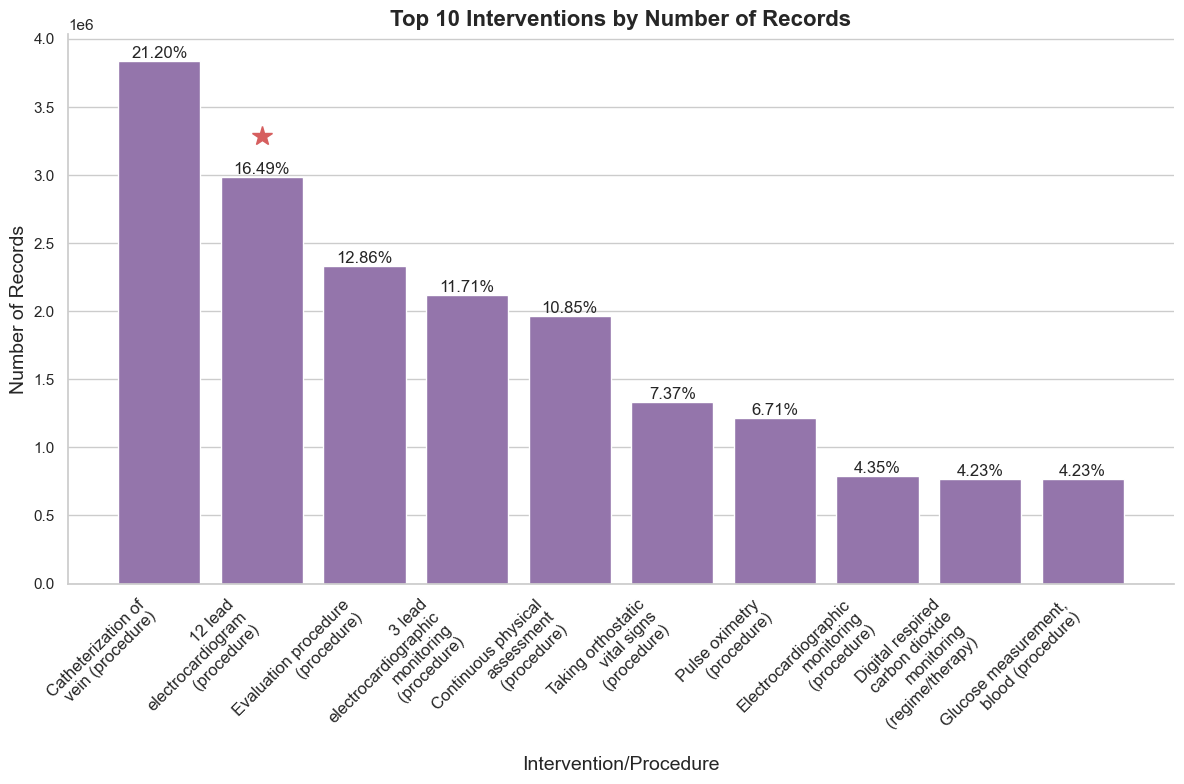

In [5]:

# Assuming procedures_cnt is your dictionary
procedures_df = pd.read_csv(os.path.join(root,'Statistics','procedures_count.csv'))

# Calculate the total count of all procedures
total_count = procedures_df['Count'].sum()
procedures_df['Percentage'] = (procedures_df['Count'] / total_count) * 100

#print count of bag valve mask
print(procedures_df[procedures_df['Procedure'] == 'Bag valve mask ventilation (procedure)'])

# Select top 10 procedures based on 'Count'
top_10_procedures = procedures_df.sort_values('Count', ascending=False).head(10)

# remove word "procedure" from the procedure column
# top_10_procedures['Procedure'] = top_10_procedures['Procedure'].str.replace(' (procedure)', '')

# Recalculate percentages for the top 10 procedures only
top_10_total_count = top_10_procedures['Count'].sum()
top_10_procedures['Percentage'] = (top_10_procedures['Count'] / top_10_total_count) * 100

# Function to wrap labels
def wrap_labels(label, width):
    return "\n".join(textwrap.wrap(label, width))

# Apply the wrapping function to each label
wrapped_labels = [wrap_labels(label, 20) for label in top_10_procedures['Procedure']]


print(top_10_procedures)
# Set the style and color palette
sns.set(style='whitegrid', palette='muted')

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 8))
bars = sns.barplot(x=wrapped_labels, y=top_10_procedures['Count'], color='m')

# Add labels and titles
plt.xlabel('Intervention/Procedure', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)
plt.title('Top 10 Interventions by Number of Records', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add count numbers and correct percentages on top of each bar
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    percentage = top_10_procedures['Percentage'].iloc[i]
    bars.annotate(f'{percentage:.2f}%', (bar.get_x() + bar.get_width() / 2.0, height),
                  ha='center', va='bottom', fontsize=12)


# Add marker for the specific procedure
# List of procedures to mark with a marker
procedures_to_mark = ["12 lead electrocardiogram (procedure)", 'Bag valve mask ventilation (procedure)', 'Cardiopulmonary resuscitation (procedure)', 'External ventricular defibrillation (procedure)' ]  # replace with actual procedure names

# Add markers for the specified procedures
for procedure in procedures_to_mark:
    if procedure in top_10_procedures['Procedure'].values:
        idx = top_10_procedures['Procedure'].values.tolist().index(procedure)
        bar = bars.patches[idx]
        # Add marker at the top of this bar
        plt.plot(bar.get_x() + bar.get_width() / 2.0, 1.1*bar.get_height(), marker="*", markersize=15, color="r", zorder=5)

# Remove the top and right spines for a cleaner look
sns.despine()

# Tight layout for better spacing
plt.tight_layout()

plt.savefig('./outputs/top_10_interventions.png')
# Show the plot
plt.show()


/tmp/ipykernel_13878/614679361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Percentage'] = (filtered_df['Count'] / total_count) * 100


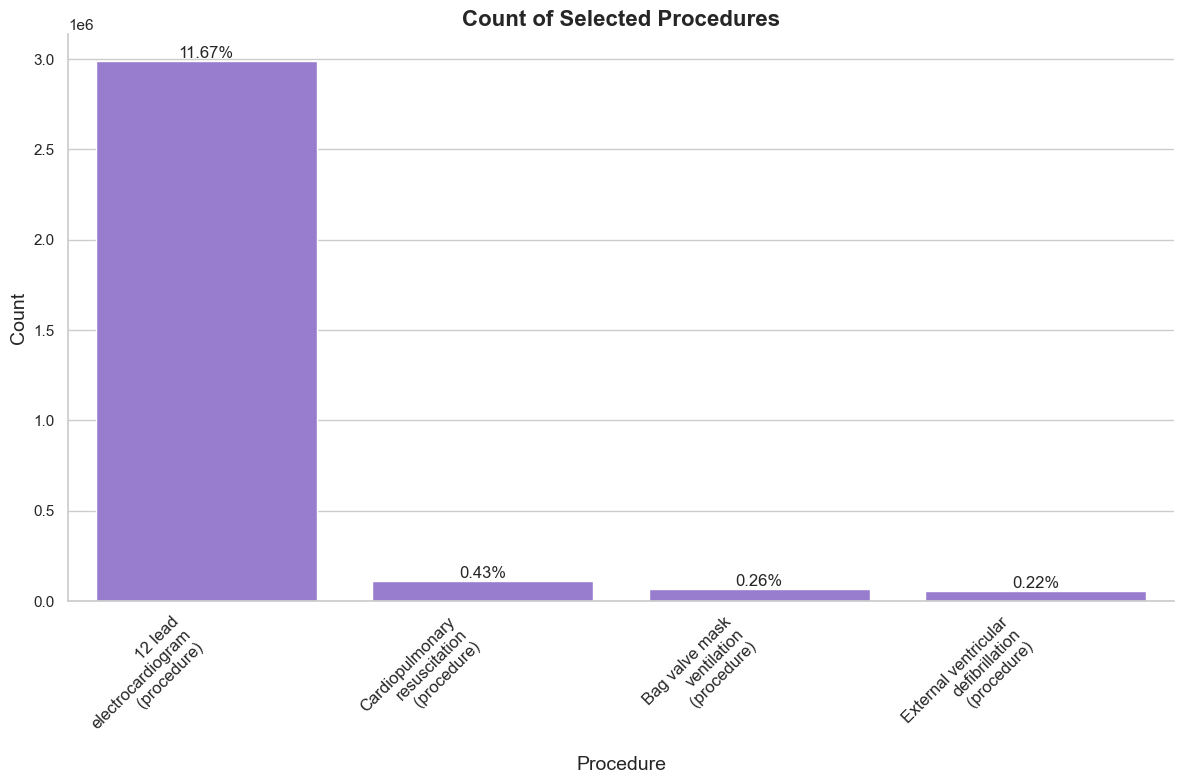

In [6]:

# Filter the DataFrame to include only the selected procedures
filtered_df = procedures_df[procedures_df['Procedure'].isin(procedures_to_mark)]

# Calculate the percentage for each selected procedure
filtered_df['Percentage'] = (filtered_df['Count'] / total_count) * 100

# Function to wrap labels
def wrap_labels(label, width):
    return "\n".join(textwrap.wrap(label, width))

# Apply the wrapping function to each label
wrapped_labels = [wrap_labels(label, 20) for label in filtered_df['Procedure']]

# Set Seaborn style for modern look
sns.set(style="whitegrid", palette="muted")

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 8))
bars = sns.barplot(x=wrapped_labels, y=filtered_df['Count'], color='mediumpurple')

# Add labels and title
plt.xlabel('Procedure', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Selected Procedures', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add count numbers and correct percentages on top of each bar
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    percentage = filtered_df['Percentage'].iloc[i]
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=12)

# Remove the top and right spines for a cleaner look
sns.despine()

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


## Protocol Visualization

In [7]:
# Read protocol count from json
with open(os.path.join(root, 'Statistics', 'Protocol Numbers.json'), 'r') as f:
    protocol_cnt = json.load(f)

/tmp/ipykernel_13878/1348601434.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=wrapped_labels, y=numbers, palette=colors)


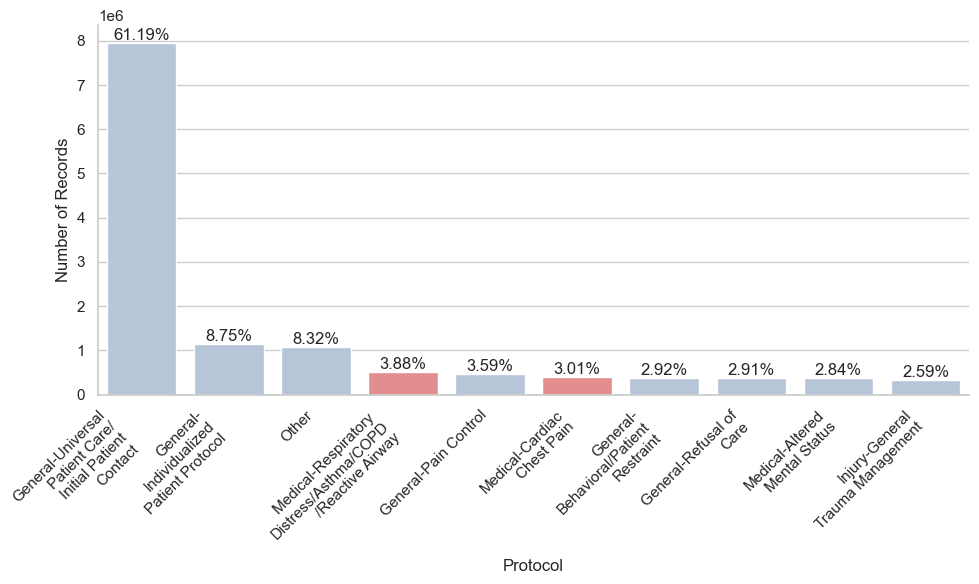

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Assuming protocol_cnt is your dictionary

# Sort the data by the number of records from highest to lowest and select the top 10
sorted_data = dict(sorted(protocol_cnt.items(), key=lambda item: item[1], reverse=True)[:10])

# Calculate the total number of records in the top 10 protocols
total_records = sum(sorted_data.values())

# Function to wrap labels
def wrap_labels(label, width):
    return "\n".join(textwrap.wrap(label, width))

# Plotting the data
protocols = list(sorted_data.keys())
numbers = list(sorted_data.values())

# Apply the wrapping function to each label
wrapped_labels = [wrap_labels(label, 20) for label in protocols]

# Determine bar colors based on whether the protocol contains "Cardiac" or "Respiratory"
colors = ['lightcoral' if 'Cardiac' in protocol or 'Respiratory' in protocol else 'lightsteelblue' for protocol in sorted_data.keys()]

# Set the Seaborn style
sns.set(style="whitegrid")

# Create the bar plot using Seaborn, passing the color palette directly
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=wrapped_labels, y=numbers, palette=colors)

plt.ylabel('Number of Records')
plt.xlabel('Protocol')
# plt.title('Top 10 Protocols Sorted from Highest to Lowest')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better readability

# Annotate the percentage on top of each bar
for i, bar in enumerate(bars.patches):
    percentage = (numbers[i] / total_records) * 100
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{percentage:.2f}%', ha='center', va='bottom')

# Set only horizontal gridlines and remove vertical ones
# Remove top and right spines for a cleaner look
sns.despine()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipykernel_13878/885142445.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=wrapped_labels, y=numbers, palette=colors)


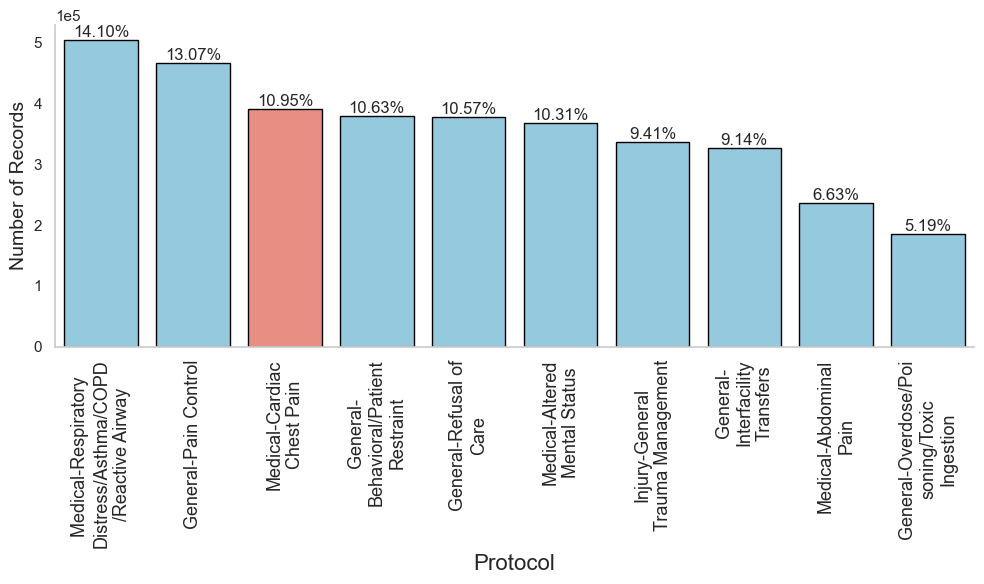

In [16]:
# Assuming protocol_cnt is your dictionary

# Remove specific general protocols
protocol_cnt_without_general = protocol_cnt.copy()
protocol_cnt_without_general.pop("General-Universal Patient Care/ Initial Patient Contact", None)
protocol_cnt_without_general.pop("Other", None)
protocol_cnt_without_general.pop("General-Individualized Patient Protocol", None)

# Sort the data by the number of records from highest to lowest and select the top 10
sorted_data = dict(sorted(protocol_cnt_without_general.items(), key=lambda item: item[1], reverse=True)[:10])

# Calculate the total number of records in the top 10 protocols
total_records = sum(sorted_data.values())

# Function to wrap labels
def wrap_labels(label, width):
    return "\n".join(textwrap.wrap(label, width))

# Plotting the data
protocols = list(sorted_data.keys())
numbers = list(sorted_data.values())

# Apply the wrapping function to each label
wrapped_labels = [wrap_labels(label, 20) for label in protocols]

# Determine bar colors based on whether the protocol contains "Cardiac" or "Respiratory"
colors = ['salmon' if 'Cardiac' in protocol  else 'skyblue' for protocol in sorted_data.keys()]

# Set Seaborn style for modern look
sns.set(style="whitegrid", palette="muted")

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=wrapped_labels, y=numbers, palette=colors)

# Add labels and title
plt.ylabel('Number of Records', fontsize=14)
plt.xlabel('Protocol', fontsize=16)
# plt.title('Top 10 Protocols Without General Patient Care', fontsize=16, fontweight='bold')

# Rotate x labels for readability
plt.xticks(rotation=90, ha='center', fontsize=13)

# add edge color to the bars
for bar in bars.patches:
    bar.set_edgecolor('black')



# Y ticks in scientific notation e.g. 1e6
ax = plt.gca()  # Get the current axis
ax.get_yaxis().get_major_formatter().set_scientific(True)  # Enable scientific notation
ax.get_yaxis().get_major_formatter().set_powerlimits((0, 1))  # Force scientific notation for all values

# X label font size

# Annotate percentage on top of each bar
for bar, num in zip(bars.patches, numbers):
    percentage = (num / total_records) * 100
    height = bar.get_height()
    bars.annotate(f'{percentage:.2f}%', (bar.get_x() + bar.get_width() / 2.0, height),
                  ha='center', va='bottom', fontsize=12)

# Remove top and right spines for a cleaner look
sns.despine()

# hide gridlines
plt.grid(False)

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig('./outputs/top_10_protocols_without_general.png')
# Show the plot
plt.show()


## Side by Side

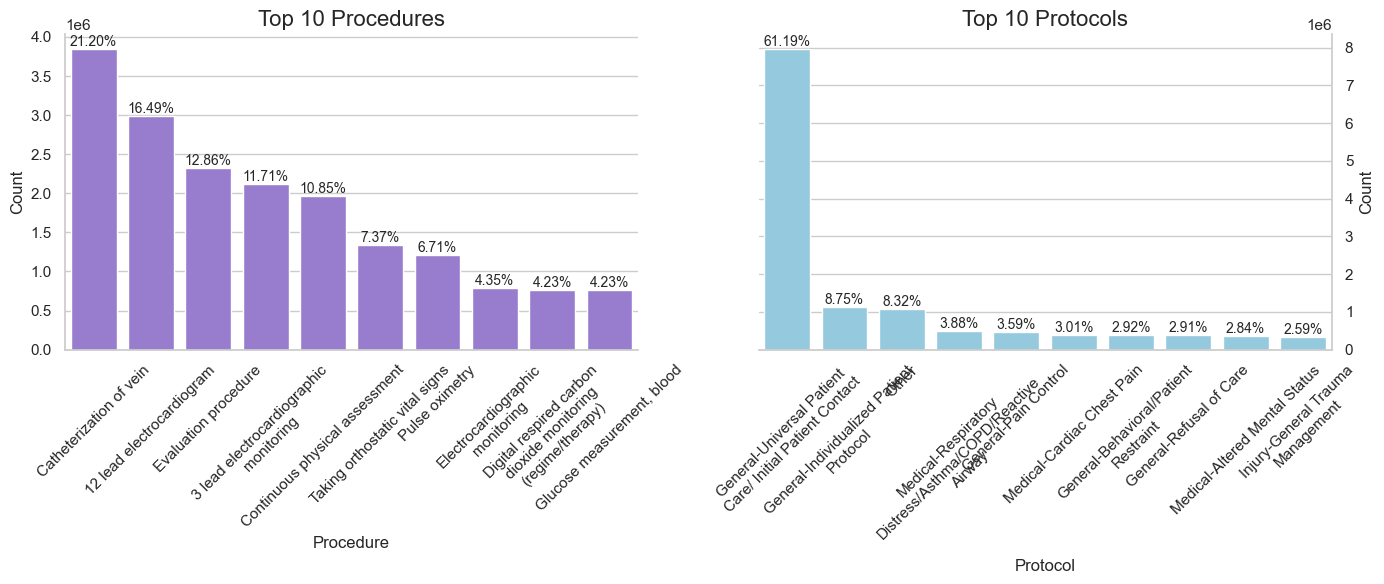

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import textwrap

# Load the dataset from the file (update with correct path if needed)
# Assuming `procedures_df` and `protocols_df` are DataFrames from the loaded CSV file
procedure_df_path = os.path.join(root, 'Statistics', 'procedures_count.csv')
protocol_df_path = os.path.join(root, 'Statistics', 'protocol_count.csv')
procedures_df = pd.read_csv(procedure_df_path)  # Adjust with the actual file name if different
protocols_df = pd.read_csv(protocol_df_path)  # Adjust with the actual file name if different

# Sort the data for top 10 procedures
top_10_procedures = procedures_df.sort_values('Count', ascending=False).head(10)
total_procedures = top_10_procedures['Count'].sum()

# Sort the data for top 10 protocols
top_10_protocols = protocols_df.sort_values('Count', ascending=False).head(10)
total_protocols = top_10_protocols['Count'].sum()

# remove word "procedure" from the procedure column
top_10_procedures['Procedure'] = top_10_procedures['Procedure'].str.replace(' (procedure)', '')


# Function to wrap long labels
def wrap_labels(label, width=25):
    # Only wrap if the label is long enough
    if len(label) > width:
        return "\n".join(textwrap.wrap(label, width))
    return label

# Prepare wrapped labels
wrapped_procedure_labels = [wrap_labels(label, 30) for label in top_10_procedures['Procedure']]
wrapped_protocol_labels = [wrap_labels(label, 30) for label in top_10_protocols['Protocol']]

# Create the combined figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Adjust the figure size for full width Overleaf page

# Bar plot for top 10 procedures
sns.barplot(x=wrapped_procedure_labels, y=top_10_procedures['Count'], ax=axes[0], color='mediumpurple')
axes[0].set_title('Top 10 Procedures', fontsize=16)
axes[0].set_xlabel('Procedure', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Annotate the percentages on top of each bar
for i, bar in enumerate(axes[0].patches):
    percentage = (top_10_procedures['Count'].iloc[i] / total_procedures) * 100
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2.0, height, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10)

# Bar plot for top 10 protocols
sns.barplot(x=wrapped_protocol_labels, y=top_10_protocols['Count'], ax=axes[1], color='skyblue')
axes[1].set_title('Top 10 Protocols', fontsize=16)
axes[1].set_xlabel('Protocol', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Annotate the percentages on top of each bar
for i, bar in enumerate(axes[1].patches):
    percentage = (top_10_protocols['Count'].iloc[i] / total_protocols) * 100
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2.0, height, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10)

# Move the y-axis to the right side for the second plot
axes[1].yaxis.tick_right()  # Move the ticks to the right
axes[1].yaxis.set_label_position("right")  # Move the label to the right

# Adjust the spines: remove left spine, and enable the right spine
axes[1].spines['left'].set_visible(False)
axes[1].spines['right'].set_visible(True)

# Apply sns.despine selectively, removing spines for the first plot and leaving the right spine for the second plot
sns.despine(ax=axes[0], left=False, bottom=False)  # Keep left spine for first plot
sns.despine(ax=axes[1], left=True, bottom=False, right=False)  # Only remove the left spine for the second plot

# 
# Adjust layout and display
plt.tight_layout()
plt.show()
